In [4]:
import os
import numpy
import pathlib
import toml
import matplotlib
from matplotlib import pyplot

In [5]:
matplotlib.rc_file_defaults()

In [111]:
simpath = pathlib.Path(os.path.expandvars('$GROUP_FOLDER/home-folder/reinhardt/simruns/2019-11-27'))

In [112]:
simpath

PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27')

In [113]:
list(simpath.glob('run*'))

[PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S10.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S0.5k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S0.1k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S5.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S20.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S1.0k')]

In [6]:
def load_run(path):
    path = pathlib.Path(path)
    info = toml.load(path / 'info.toml')
    mut_inf = numpy.load(path / 'mutual_information.npz')
    data = {}
    for key, val in mut_inf.items():
        data[key] = numpy.mean(val, axis=0)
    return {'info': info, 'data': data}

In [147]:
#simulation_results = [load_run(path) for path in simpath.glob('run*')]
#simulation_results = [load_run(pathlib.Path.home() / 'testrun'), load_run(pathlib.Path.home() / 'testrun2'), load_run(pathlib.Path.home() / 'testrun3')]
simulation_results = [load_run(pathlib.Path('/data/2019-12-11/run_low_6a')), load_run(pathlib.Path('/data/2019-12-11/run_low_6b'))]

In [148]:
simulation_results[1]['info']

{'num_responses': 2000,
 'num_signals': 0,
 'output': 'run_low_6b',
 'signal_path': 'signals_20.0k.npz',
 'distribution_path': 'distribution_10k.npy',
 'num_processes': 36,
 'description': 'Try batching responses\n',
 'kde_estimate': {'size': 10000,
  'signal': {'length': 4000, 'initial': 50},
  'response': {'initial': 100}},
 'signal': {'length': 1000,
  'components': ['S'],
  'reactions': [{'k': 0.25, 'reactants': [], 'products': ['S']},
   {'k': 0.005, 'reactants': ['S'], 'products': []}]},
 'response': {'length': 2000,
  'batch_size': 10000,
  'components': ['X'],
  'reactions': [{'k': 0.01, 'reactants': ['S'], 'products': ['S', 'X']},
   {'k': 0.01, 'reactants': ['X'], 'products': []}]},
 'run': {'started': datetime.datetime(2019, 12, 13, 15, 18, 29, 730903, tzinfo=<toml.tz.TomlTz object at 0x7f172228fb10>),
  'invocation': ['/home/ipausers/reinhardt/Gillespie/mutual_information.py'],
  'node': 'node15.hollandia.amolf.nl',
  'error': "BrokenProcessPool('A process in the process po

In [149]:
pyplot.plot(simulation_results[0]['data']['trajectory_length'], simulation_results[0]['data']['response_entropy'])
pyplot.plot(simulation_results[1]['data']['trajectory_length'], simulation_results[1]['data']['conditional_entropy'])

KeyError: 'response_entropy'

In [296]:
numerical_x = numpy.array([6.10351562e-01, 1.22070312e+00, 2.44140625e+00, 4.88281250e+00,
       9.76562500e+00, 1.95312500e+01, 3.90625000e+01, 7.81250000e+01,
       1.56250000e+02, 3.12500000e+02, 6.25000000e+02, 1.25000000e+03,
       2.50000000e+03])
numerical = numpy.array([0.07155042, 0.07221034, 0.07352942, 0.07616464, 0.08142376,
       0.09190024, 0.1127109 , 0.15391634, 0.23541893, 0.39725253,
       0.72029812, 1.36630923, 2.65833046])

In [68]:
# kappa = 0.25
# lamda = 0.005
# rho = 0.01
# mu = 0.01

numerical_x = numpy.array([  3.2       ,   4.75518173,   7.06617289,  10.50029256,
         15.60337477,  23.18652581,  34.45504493,  51.2       ,
         76.0829076 , 113.0587662 , 168.00468091, 249.65399638,
        370.98441288, 551.2807189 , 819.2       ])
numerical = numpy.array([0.16057347, 0.16313811, 0.16753439, 0.17376199, 0.18328551,
        0.19683625, 0.21770779, 0.24809272, 0.29384163, 0.36153363,
        0.46213797, 0.61138198, 0.83304402, 1.1629737 , 1.65274695])

In [12]:
# kappa = 20
# lamda = 0.005
# rho = 0.005
# mu = 0.02

numerical_x = numpy.array([  3.2       ,   4.75518173,   7.06617289,  10.50029256,
         15.60337477,  23.18652581,  34.45504493,  51.2       ,
         76.0829076 , 113.0587662 , 168.00468091, 249.65399638,
        370.98441288, 551.2807189 , 819.2       ])

numerical = numpy.array([0.07479552, 0.07630788, 0.07889759, 0.0825603 , 0.08814903,
        0.09607703, 0.10823872, 0.12585288, 0.15221438, 0.19097506,
        0.24826353, 0.33292631, 0.45843805, 0.64515182, 0.9223015 ])

In [69]:
# kappa = 0.25
# lamda = 0.005
# rho = 0.01
# mu = 0.01

numerical_x = numpy.array([0.032     , 0.04755182, 0.07066173, 0.10500293, 0.15603375,
        0.23186526, 0.34455045, 0.512     , 0.76082908, 1.13058766,
        1.68004681, 2.49653996, 3.70984413, 5.51280719, 8.192, 10.50029256,
         15.60337477,  23.18652581,  34.45504493,  51.2       ,
         76.0829076 , 113.0587662 , 168.00468091, 249.65399638,
        370.98441288, 551.2807189 , 819.2     ])
numerical = numpy.array([0.15513246, 0.15515813, 0.15520213, 0.15526446, 0.15535979,
        0.15549546, 0.15570446, 0.15601245, 0.15646711, 0.15714541,
        0.1581537 , 0.1596496 , 0.16187138, 0.16517824, 0.17009058, 0.17376199, 0.18328551,
        0.19683625, 0.21770779, 0.24809272, 0.29384163, 0.36153363,
        0.46213797, 0.61138198, 0.83304402, 1.1629737 , 1.65274695])

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


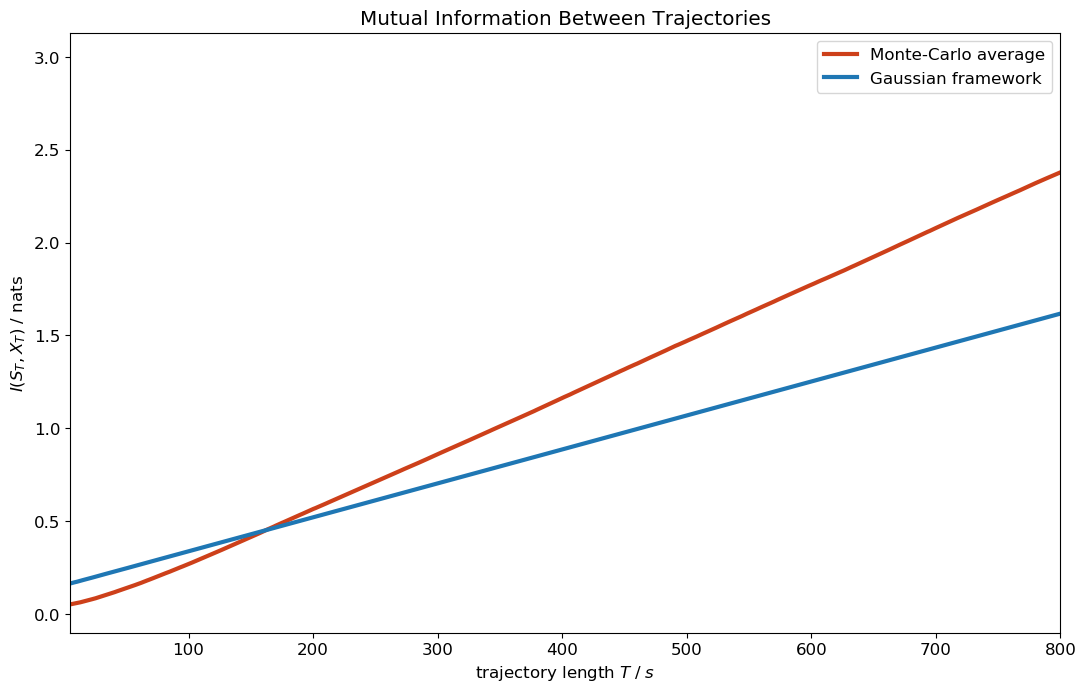

In [115]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'TeX Gyre Heros'})

for res in sorted(simulation_results, key=lambda x: x['info']['num_signals']):
    try:
        pyplot.plot(res['data']['trajectory_length'], res['data']['mutual_information'], label=f"Monte-Carlo average", linewidth=3, color='#CD401A')
    except:
        pass

pyplot.plot(numerical_x, numerical, label='Gaussian framework', linewidth=3)
    
pyplot.legend();
pyplot.xlim(5,800)
pyplot.title('Mutual Information Between Trajectories')
pyplot.ylabel('$I(S_T, X_T)$ / nats')
pyplot.xlabel('trajectory length $T \;/\\; s$')
pyplot.gcf().set_size_inches(28/2.54, 18/2.54)
pyplot.tight_layout();
pyplot.savefig('signals.pdf')

In [8]:
mi = simulation_results[0]['data']['mutual_information']
mi_x = simulation_results[0]['data']['trajectory_length']
start = 4500
(numerical[-1] - numerical[3]) / (numerical_x[-1] - numerical_x[3]), (mi[-1] - mi[start]) / (mi_x[-1] - mi_x[start])

(0.0010383844488558852, 0.0017764203853393537)

In [231]:
numerical.size2

15

In [9]:
numpy.log(1/0.0010383844488558852 * 0.0017764203853393537)

0.5369342292247168

In [3]:
mut_inf = numpy.load(pathlib.Path('/data/2019-12-04/run_S5.0k-3') / 'mutual_information.npz')
comp_per_sig = mut_inf['mutual_information'].reshape((180,500, -1))
timestamps = mut_inf['trajectory_length']

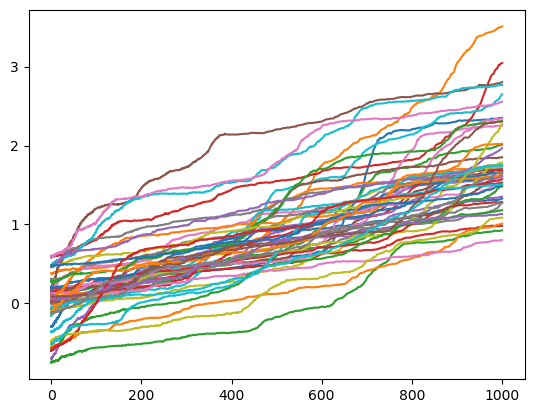

In [6]:
for i, t, m in zip(range(50), timestamps, numpy.mean(comp_per_sig, axis=1)):
    pyplot.plot(t, m)

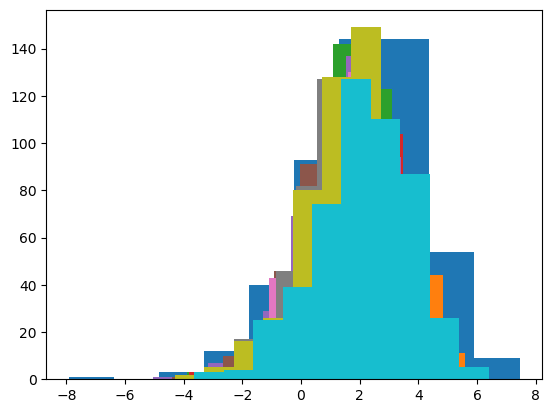

In [12]:
for _, data in zip(range(10), comp_per_sig[...,-100]):
    pyplot.hist(data)

KeyError: 'mutual_information'

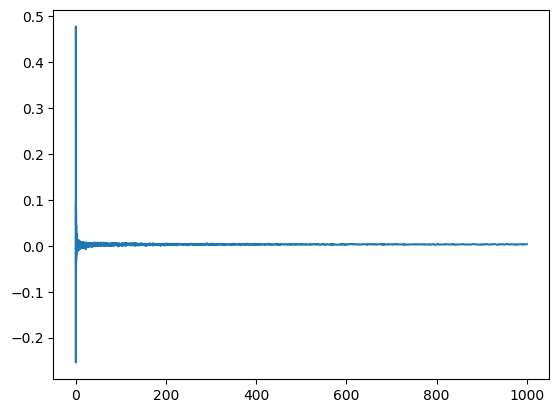

In [28]:
for res in simulation_results:
    t = res['data']['trajectory_length']
    pyplot.plot(t[1:], numpy.diff(res['data']['mutual_information']) / numpy.diff(t), label=f"{res['info']['num_signals']} signals")
    #pyplot.plot(t[1:], numpy.diff(res['data']['conditional_entropy']) / numpy.diff(t), label=f"{res['info']['num_signals']} signals")

pyplot.legend()
pyplot.ylim(-0.05,0.05)

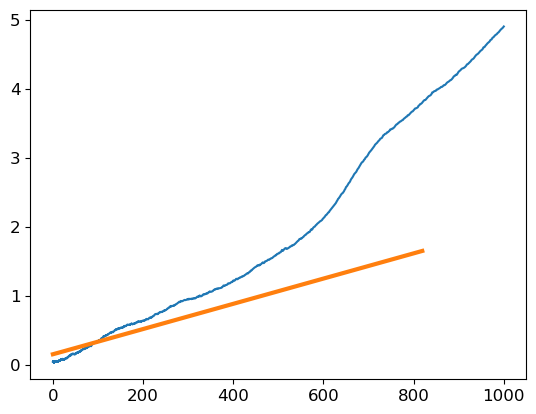

In [138]:
pyplot.plot(simulation_results[0]['data']['trajectory_length'], simulation_results[0]['data']['response_entropy'] - simulation_results[1]['data']['conditional_entropy'])
pyplot.plot(numerical_x, numerical, label='Gaussian framework', linewidth=3)


In [25]:
old_run['data']['trajectory_length']

array([9.9994596e-03, 1.0023882e-02, 1.0045982e-02, ..., 9.9524786e+02,
       9.9779907e+02, 1.0000000e+03], dtype=float32)

In [26]:
simulation_results[0]['data']['trajectory_length']

array([9.9999923e-03, 1.0023084e-02, 1.0046151e-02, ..., 9.9540588e+02,
       9.9770172e+02, 1.0000000e+03], dtype=float32)

In [63]:
simulation_results[2]['data']

{'trajectory_length': array([9.99999326e-03, 1.00230705e-02, 1.00461617e-02, ...,
        9.95405762e+02, 9.97701172e+02, 1.00000000e+03], dtype=float32),
 'conditional_entropy': array([   6.7915768 ,    6.7915768 ,    6.7915768 , ..., 1705.28844427,
        1709.1595463 , 1713.07904231])}

In [139]:
path = pathlib.Path('/data/2019-12-11/run_low_5a')
marginal_entropy = numpy.load(path / 'mutual_information.npz')['response_entropy']

In [140]:
path = pathlib.Path('/data/2019-12-11/run_low_5b')
conditional_entropy = numpy.load(path / 'mutual_information.npz')['conditional_entropy']

In [141]:
marginal_entropy.dtype

dtype('float64')

10.013827825848304


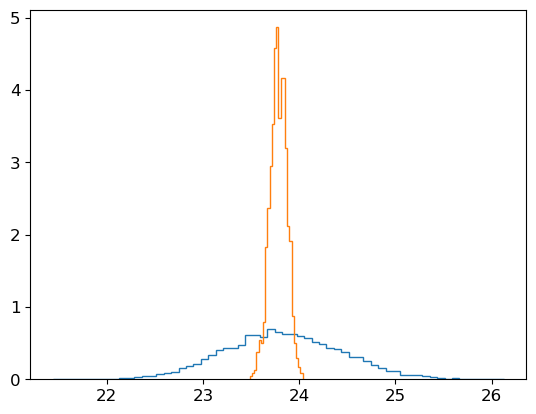

In [143]:
index = 3000
print(simulation_results[0]['data']['trajectory_length'][index])
pyplot.hist(marginal_entropy[:, index], bins='auto', histtype='step', density=True)
pyplot.hist(conditional_entropy[:, index], bins='auto', histtype='step', density=True);

In [55]:
ce_m = numpy.load('/data/2019-12-11/run_low_2b/ce_mean.npy')

In [125]:
marginal_entropy[:, index].shape

(10000,)